In [1]:
import pandas
from scipy import stats
import numpy as np
import sklearn
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.neighbors
import sklearn.feature_selection
import sklearn.metrics
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
my_csv = pandas.read_csv("weatherAUS.csv")

 I will ignore the columns: sunshine, evaporation, cloud3pm, cloud9am,
       because few of the rows have information.

In [3]:
print(my_csv.count().sort_values())

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64


location because I will try to determine if it will rain in australia
       generally not in a specific location.
RSK_MM so it wont leak any info to the model
date.

In [4]:
my_csv = my_csv.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Location', 'RISK_MM', 'Date'], axis=1)

axis 1 makes it so it will drop by the name of the col
its clear to see that the number of cols went from 24 to 17

In [5]:
print(my_csv.shape)

(142193, 17)


removing all NaN rows from the dataset

In [6]:
my_csv = my_csv.dropna(how='any')

In [7]:
z = np.abs(stats.zscore(my_csv.select_dtypes(include=[np.number])))
print(z)

[[0.11756741 0.10822071 0.20666127 ... 1.14245477 0.08843526 0.04787026]
 [0.84180219 0.20684494 0.27640495 ... 1.04184813 0.04122846 0.31776848]
 [0.03761995 0.29277194 0.27640495 ... 0.91249673 0.55672435 0.15688743]
 ...
 [1.44940294 0.23548728 0.27640495 ... 0.58223051 1.03257127 0.34701958]
 [1.16159206 0.46462594 0.27640495 ... 0.25166583 0.78080166 0.58102838]
 [0.77784422 0.4789471  0.27640495 ... 0.2085487  0.37167606 0.56640283]]


In [8]:
my_csv = my_csv[(z < 3).all(axis=1)]
print(my_csv)

        MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0          13.4     22.9       0.6           W           44.0          W   
1           7.4     25.1       0.0         WNW           44.0        NNW   
2          12.9     25.7       0.0         WSW           46.0          W   
3           9.2     28.0       0.0          NE           24.0         SE   
4          17.5     32.3       1.0           W           41.0        ENE   
5          14.6     29.7       0.2         WNW           56.0          W   
6          14.3     25.0       0.0           W           50.0         SW   
7           7.7     26.7       0.0           W           35.0        SSE   
8           9.7     31.9       0.0         NNW           80.0         SE   
9          13.1     30.1       1.4           W           28.0          S   
10         13.4     30.4       0.0           N           30.0        SSE   
11         15.9     21.7       2.2         NNE           31.0         NE   
13         1

Replacing all the non numeric data into numeric data

In [9]:
my_csv['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
my_csv['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

for col in ['WindGustDir', 'WindDir3pm', 'WindDir9am']:
    print(np.unique(my_csv[col]))
my_csv = pandas.get_dummies(my_csv, columns=['WindGustDir', 'WindDir3pm', 'WindDir9am'])
my_csv.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,0,1,0,0,0,0,0,0


standardizing the data - using MinMaxScaler

In [10]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(my_csv)
my_csv = pandas.DataFrame(scaler.transform(my_csv), index=my_csv.index, columns=my_csv.columns)
my_csv.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.628342,0.696296,0.035714,0.465753,0.135135,0.428571,0.797753,0.33,0.342043,0.282974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.550802,0.632099,0.007143,0.671233,0.459459,0.523810,0.494382,0.23,0.304038,0.268585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.542781,0.516049,0.000000,0.589041,0.486486,0.523810,0.426966,0.19,0.313539,0.335731,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.366310,0.558025,0.000000,0.383562,0.108108,0.357143,0.415730,0.19,0.403800,0.381295,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.419786,0.686420,0.000000,1.000000,0.135135,0.619048,0.348315,0.09,0.296912,0.225420,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.510695,0.641975,0.050000,0.287671,0.351351,0.214286,0.528090,0.27,0.251781,0.275779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking which features have the most impact

In [11]:
X = my_csv.loc[:, my_csv.columns != 'RainTomorrow']
y = my_csv[['RainTomorrow']]
selector = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=4)  # best k after testing
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'RainToday'], dtype='object')


Getting only the top 4 important features

In [12]:
my_csv = my_csv[['Rainfall', 'Humidity3pm', 'RainToday', 'Humidity9am', 'RainTomorrow']]
X = my_csv[['Rainfall', 'Humidity3pm', 'RainToday', 'Humidity9am']]  #
y = my_csv[['RainTomorrow']]

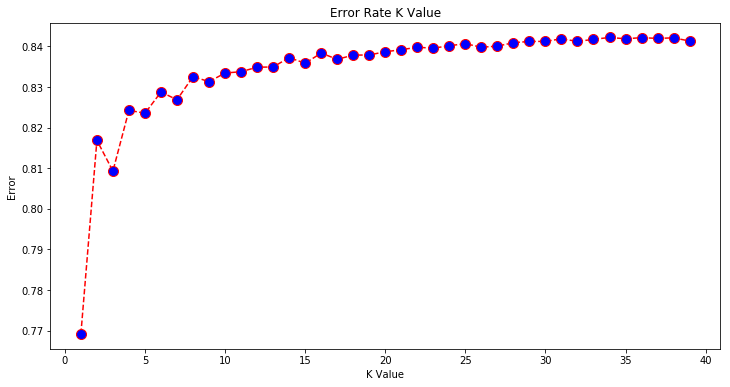

In [13]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
my_scaler = sklearn.preprocessing.StandardScaler()
my_scaler.fit(x_train)
x_train = my_scaler.transform(x_train)
x_test = my_scaler.transform(x_test)
error = []
for i in range(1, 40):
    classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    error.append(sklearn.metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.show()

In [14]:
def knn(x, yknn):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, yknn, test_size=0.2)
    my_scaler = sklearn.preprocessing.StandardScaler()
    my_scaler.fit(x_train)
    x_train = my_scaler.transform(x_train)
    x_test = my_scaler.transform(x_test)
    classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=20)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print('Accuracy :', score)

In [15]:
def logistic_regression(X, y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
    logreg = sklearn.linear_model.LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


In [16]:
def decision_tree(X, y):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
    dtc = sklearn.tree.DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    my_score = sklearn.metrics.accuracy_score(y_test, y_pred)
    print(my_score)

all three models have about 83% accuracy score